In [66]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson, nquad
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [67]:
# Aqui va su código
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(    integrand,
    [w_limits, z_limits, y_limits, x_limits])


print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")

Resultado de la integral: -0.6500971589021813
Error estimado: 1.8391891749223705e-12


In [68]:
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites
w_limits_1 = lambda z, y, x: z**2
w_limits_2 = lambda z, y, x: z+3
z_limits_1 = lambda y, x: y**2
z_limits_2 = lambda y, x: y+2
y_limits_1 = lambda x: x**2
y_limits_2 = lambda x: x+1

# Anidar las integrales correctamente
result = quad(
    lambda x: quad(
        lambda y: quad(
            lambda z: quad(
                lambda w: integrand(w, z, y, x),
                w_limits_1(z, y, x), w_limits_2(z, y, x)
            )[0],
            z_limits_1(y, x), z_limits_2(y, x)
        )[0],
        y_limits_1(x), y_limits_2(x)
    )[0],
    0, 1
)
resultn_quad = nquad(    integrand,
    [w_limits, z_limits, y_limits, x_limits])
print(f"Resultado de la integral nquad: {resultn_quad[0]}")
print(f"Error estimado nquad: {resultn_quad[1]}")
print(f"Resultado de la integral: {result[0]}")
print(f"Error estimado: {result[1]}")
print(f"Error relativo: {abs(result[0] - resultn_quad[0])}")

Resultado de la integral nquad: -0.6500971589021813
Error estimado nquad: 1.8391891749223705e-12
Resultado de la integral: -0.6500971589021813
Error estimado: 1.5813253071872154e-13
Error relativo: 0.0


In [69]:
result = nquad(    integrand,
    [w_limits, z_limits, y_limits, x_limits])
result[0]

-0.6500971589021813

# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



In [70]:
a = 1
I = 3
mu = 1

def k_square(r, theta):
    return (4 * r * np.sin(theta)) / (1 + r**2 + 2 * r * np.sin(theta))

def k_k(r, theta):
    k_sq = k_square(r, theta)
    integrand = lambda x: 1 / np.sqrt(1 - k_sq * (np.sin(x)**2))
    return quad(integrand, 0, np.pi/2)[0]

def E_k(r, theta):
    k_sq = k_square(r, theta)
    integrand = lambda x: np.sqrt(1 - k_sq * (np.sin(x)**2))
    return quad(integrand, 0, np.pi/2)[0]

def A_r_theta(r, theta):
    k_sq = k_square(r, theta)
    K = k_k(r, theta)
    E = E_k(r, theta)
    numerator = (2 - k_sq) * K - 2 * E
    return mu * ((4 * I * a) / (a**2 + r**2 + 2 * a * r * np.sin(theta))) * (numerator / k_sq)



<ipython-input-70-66c72d54cf95>:23: RuntimeWarning: invalid value encountered in scalar divide
  return mu * ((4 * I * a) / (a**2 + r**2 + 2 * a * r * np.sin(theta))) * (numerator / k_sq)


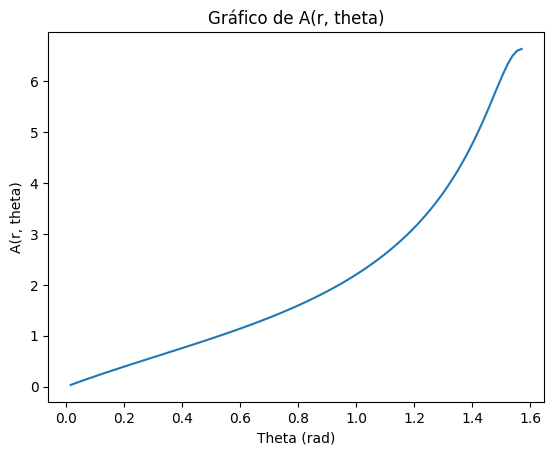

In [71]:
# Graficar A(r, theta)
r = 1.1
theta = np.linspace(0, np.pi/2, 100)
A_values = np.array([A_r_theta(r, t) for t in theta])

plt.plot(theta, A_values)
plt.xlabel('Theta (rad)')
plt.ylabel('A(r, theta)')
plt.title('Gráfico de A(r, theta)')
plt.show()

<ipython-input-70-66c72d54cf95>:23: RuntimeWarning: invalid value encountered in scalar divide
  return mu * ((4 * I * a) / (a**2 + r**2 + 2 * a * r * np.sin(theta))) * (numerator / k_sq)


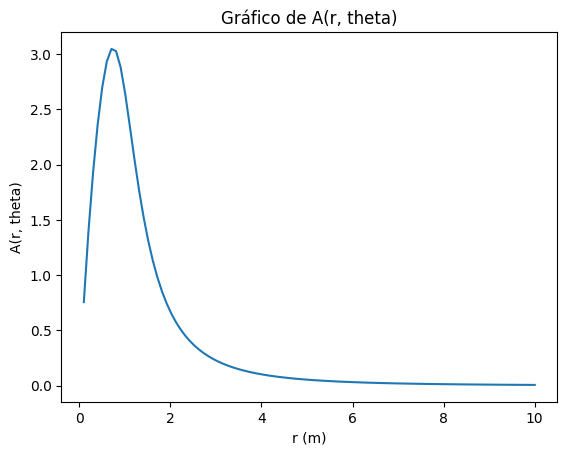

In [72]:
# Graficar A(r, theta)
r_values = np.linspace(0, 10, 100)
theta = np.pi/3
A_values = np.array([A_r_theta(t, theta) for t in r_values])

plt.plot(r_values, A_values)
plt.xlabel('r (m)')
plt.ylabel('A(r, theta)')
plt.title('Gráfico de A(r, theta)')
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [73]:
def potencia_inversa(A):
  x_old = [0.1,0.1]
  y_k = np.linalg.solve(A, x_old)
  x_new = y_k / np.linalg.norm(y_k)
  eign = 1
  contador = 0
  eign_container = [0]
  while np.linalg.norm(x_new - x_old) > 1e-7:
    x_old = x_new
    x_new = np.linalg.solve(A, x_old)
    x_new = x_new/(np.linalg.norm(x_new))
    eign = np.dot(x_new.T, np.dot(A, x_new))/(np.dot(x_new.T,x_new))
    contador += 1
    eign_container.append(eign)

  return eign, contador, eign_container





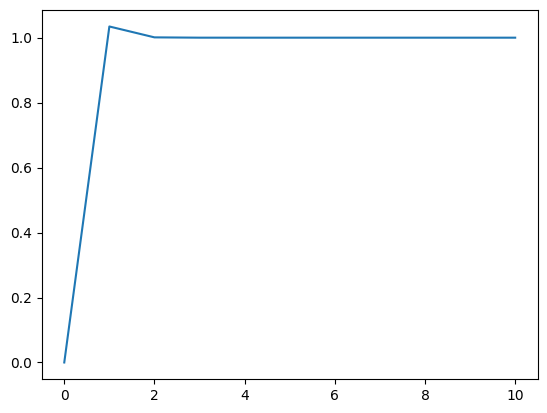

In [74]:
A = np.array([[5,2],[2,2]])
eign, vector = np.linalg.eig(A)
eign1, contador_1, vectores = potencia_inversa(A)
plt.plot(range(contador_1+1), vectores)
plt.show()

In [75]:
error = abs(eign[1] - potencia_inversa(A)[0])
print(error)

4.440892098500626e-16


#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [79]:
A = np.random.rand(5,5)
eign, vector = np.linalg.eig(A)
determinant = np.linalg.det(A)
determinant_eign = np.prod(eign)
print(determinant)
print(eign)
print(determinant_eign)
print("error" , abs(determinant - determinant_eign))

-0.04768512993229201
[ 2.63492643+0.j          0.46733963+0.j         -0.23324224+0.j
 -0.36149802+0.18800169j -0.36149802-0.18800169j]
(-0.04768512993229209+0j)
error 8.326672684688674e-17
